Pierre Navaro - [Institut de Recherche Mathématique de Rennes](https://irmar.univ-rennes1.fr) - [CNRS](http://www.cnrs.fr/)

# References

- [SciPy 2017 tutorial](https://youtu.be/5jzIVp6bTy0)

The function init_printing() will enable LaTeX pretty printing in the notebook for SymPy expressions.

In [127]:
from sympy import *
import sympy as sym
init_printing()

In [128]:
x= Symbol('x')

(pi + x)**2

In [129]:
alpha1, omega_2 = symbols('alpha1 omega_2')
alpha1, omega_2

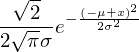

In [130]:
mu, sigma = symbols('mu sigma', positive = True)
1/sqrt(2*pi*sigma**2)* exp(-(x-mu)**2/(2*sigma**2))

# Why use `sympy`?
- Symbolic derivatives
- Translate mathematics into low level code
- Deal with very large expressions
- Optimize code using mathematics

Dividing two integers in Python creates a float, like 1/2 -> 0.5. If you want a rational number, use Rational(1, 2) or S(1)/2.

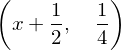

In [131]:
x + S(1)/2 , Rational(1,4)

In [132]:
y = Symbol('y')
x ^ y # XOR operator (True only if x != y)

In [133]:
x**y

SymPy expressions are immutable. Functions that operate on an expression return a new expression.

In [134]:
expr = x + 1
expr

In [135]:
expr.subs(x, 2)

In [136]:
expr

Evaluate a floating point approximation up to a user specified number of digits.

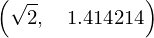

In [137]:
sqrt(2), sqrt(2).evalf(7)

In [138]:
fibonacci(100)

## Undefined functions and derivatives

Undefined functions are created with `Function()`. Undefined are useful to state that one variable depends on another (for the purposes of differentiation).

In [139]:
f = Function('f')

In [140]:
f(x) + 1

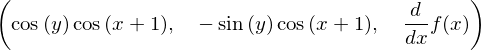

In [141]:
diff(sin(x + 1)*cos(y), x), diff(sin(x + 1)*cos(y), x, y), diff(f(x), x)

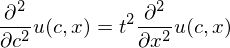

In [142]:
c, t = symbols('t c')
u = Function('u')
Eq(diff(u(t,x),t,t), c**2*diff(u(t,x),x,2))

# Matrices

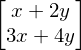

In [143]:
Matrix([[1, 2], [3, 4]])*Matrix([x, y])

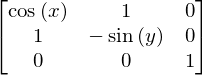

In [144]:
x, y, z = symbols('x y z')
Matrix([sin(x) + y, cos(y) + x, z]).jacobian([x, y, z])

## Matrix symbols

SymPy can also operate on matrices of symbolic dimension ($n \times m$). `MatrixSymbol("M", n, m)` creates a matrix $M$ of shape $n \times m$. 

In [145]:
n, m = symbols('n m', integer=True)
M = MatrixSymbol("M", n, m)
b = MatrixSymbol("b", m, 1)
Transpose(M*b)

In [146]:
Transpose(M*b).doit()

## Solving systems of equations

`solve` solves equations symbolically (not numerically). The return value is a list of solutions. It automatically assumes that it is equal to 0.

In [147]:
solve(Eq(x**2, 4), x)


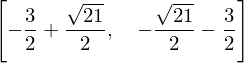

In [148]:
solve(x**2 + 3*x - 3, x)

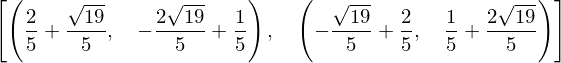

In [149]:
eq1 = x**2 + y**2 - 4  # circle of radius 2
eq2 = 2*x + y - 1  # straight line: y(x) = -2*x + 1
solve([eq1, eq2], [x, y])

## Solving differential equations
`dsolve` can (sometimes) produce an exact symbolic solution. Like `solve`, `dsolve` assumes that expressions are equal to 0. 

In [150]:
f = Function('f')
dsolve(f(x).diff(x, 2) + f(x))

## Code printers
The most basic form of code generation are the code printers. They convert SymPy expressions into over a dozen target languages.


In [151]:
x = symbols('x')
expr = abs(sin(x**2))
expr

In [152]:
ccode(expr)

'fabs(sin(pow(x, 2)))'

In [153]:
fcode(expr, standard=2003, source_format='free')

'abs(sin(x**2))'

In [154]:
from sympy.printing.cxxcode import cxxcode
cxxcode(expr)

'fabs(sin(std::pow(x, 2)))'

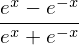

In [155]:
tanh(x).rewrite(exp)

In [156]:
expr = 1/sqrt(2*pi*sigma**2)* exp(-(x-mu)**2/(2*sigma**2))
print(fcode(expr, standard=2003, source_format='free'))

parameter (pi = 3.14159265358979d0)
(1.0d0/2.0d0)*sqrt(2.0d0)*exp(-0.5d0*(-mu + x)**2/sigma**2)/(sqrt(pi)* &
      sigma)


In [157]:
binomial_coefficients(3)

## Creating a function from a symbolic expression
In SymPy there is a function to create a Python function which evaluates (usually numerically) an expression. SymPy allows the user to define the signature of this function (which is convenient when working with e.g. a numerical solver in ``scipy``).

In [158]:
x, y = symbols('x y')
expr = 3*x**2 + log(x**2 + y**2 + 1)
expr

In [159]:
%timeit expr.subs({x: 17, y: 42}).evalf()

301 µs ± 4.82 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [160]:
import math
f = lambda x, y: 3*x**2 + math.log(x**2 + y**2 + 1)
f(17, 42)

In [161]:
%timeit f(17, 42)

1.45 µs ± 8.13 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Evaluate above expression numerically invoking the subs method followed by the evalf method can be quite slow and cannot be done repeatedly.

In [162]:
g = lambdify([x, y], expr, modules=['math'])
g(17, 42)

In [163]:
%timeit g(17, 42)

1.41 µs ± 7.27 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [164]:
import numpy as np
xarr = np.linspace(17, 18, 5)
h = lambdify([x, y], expr)
out = h(xarr, 42)
out.shape

In [166]:
z = z1, z2, z3 = symbols('z:3')
expr2 = x*y*(z1 + z2 + z3)
func2 = lambdify([x, y, z], expr2)
func2(1, 2, (3, 4, 5))

Behind the scenes lambdify constructs a string representation of the Python code and uses Python's eval function to compile the function.

SIR model and SIRS with respect to time t and variables X
for constant or varying total population and any number nbc of classes
Order of variables in X : S1, ..., Snbc, I1, ..., Inbc, R1, ..., Rnbc
S_i' = nuf_i - (1/N) S_i Sum_{j=1}^nbc Beta_{ij} I_j + nup_i(S_i + I_i + R_i) + alpha_i R_i - (mu_i      + v_i + k_i) S_i : susceptibles classes
     I_i' = S_i (1/N) Sum_{j=1}^nbc Beta_{ij} I_j - (Gamma_i + mu_i + delta_i + k_i) I_i : infectious cla     sses
     R_i' = (Gamma_i + delta_i) I_i - (alpha_i + mu_i + k_i) R_i + v_i S_i : recovered classes

     :param X: values of the variables (ratio of suceptibles, infectious and recovered on initial populat     ion size N0, with N the sum of all the variables)
     :param t: time (not used because autonomous ODE)
     :param paramod: values of the model parameters by dictionary
         paramod["nbc"] : classes number
         paramod["transmission"] : transmission coefficient Beta
         paramod["healing"] : healing rate Gamma
         paramod["fbirth"] : fixed birth rate nuf
         paramod["pbirth"] : proportional birth rate nup
         paramod["mortality"] : mortality rate mu
         paramod["treatment"] : treatment rate delta
         paramod["immunity_loss "] : immunity loss rate alpha
     :return: F : function value

     Model SIR for alpha=0

     Default values : nbc=1, Beta=1.66, Gamma=1/2.2 ~ 0.4545455, alpha=nup=mu=nuf=v=delta=k=0, X0=[762,1,     0], t=t=np.linspace(0,20,101)
     Prevalence : total of all individuals affected by the deasease at a time t, P(t) = N0 Sum_{j=1}^nbc      (I_j + R_j)
     Incidence : new infected during a time interval tau = tau [ N0 Sum_{i=1}^nbc (S_i (1/N) Sum_{j=1}^nb     c Beta_{ij} I_j) ]

 